In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
import matplotlib.pyplot as plt


In [74]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X = data
y = target


In [75]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=83)


In [77]:
print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))


506
0.7984189723320159
0.2015810276679842


In [78]:
lr = LinearRegression().fit(X_train, y_train)

In [79]:
y_train_pred = lr.predict(X_train)
y_pred = lr.predict(X_test)

(-10.0, 60.0)

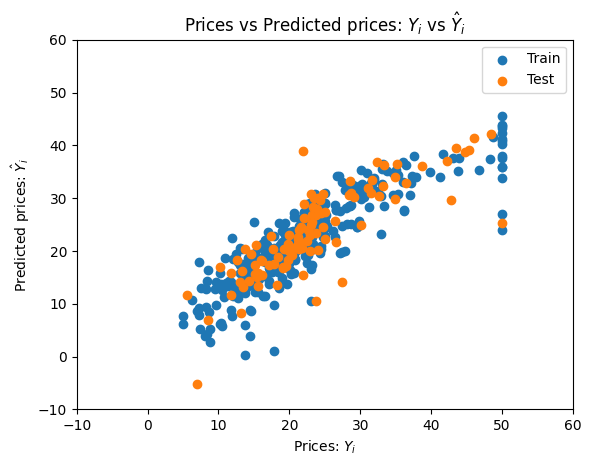

In [80]:
plt.scatter(y_train, y_train_pred, label='Train')
plt.scatter(y_test, y_pred, label='Test')
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.legend()
plt.xlim([-10, 60])
plt.ylim([-10, 60])


Dla idealnie dopasowanych danych punkty powinny być na jednej linii po przekątnej wykresu

In [81]:
mean_squared_error(y_test, y_pred)

27.06190953437723

In [88]:
lr.score(X_train, y_train_pred)

1.0

In [92]:
mean_squared_error(y_train, y_train_pred)


20.768884667366102

In [94]:
lr.score(X_test, y_pred)


1.0

In [83]:
polynomial_features = PolynomialFeatures(degree=2)
X_train_ = polynomial_features.fit_transform(X_train)
X_test_ = polynomial_features.fit_transform(X_test)
# y_train_ = polynomial_features.fit_transform(y_train)
# y_test_ = polynomial_features.fit_transform(y_test)


In [84]:
lr_ = LinearRegression().fit(X_train_, y_train)
y_train_pred_ = lr_.predict(X_train_)
y_pred_ = lr_.predict(X_test_)


(-5.0, 60.0)

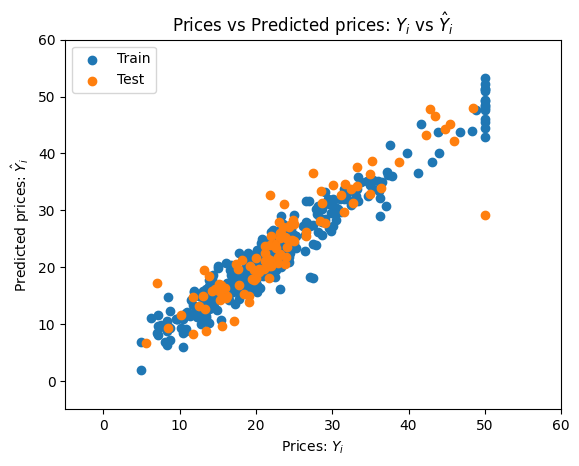

In [85]:
plt.scatter(y_train, y_train_pred_, label='Train')
plt.scatter(y_test, y_pred_, label='Test')
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.legend()
plt.xlim([-5, 60])
plt.ylim([-5, 60])


W przypadku użycia nieliniowości wykres stał się bardziej "liniowy"

In [86]:
mean_squared_error(y_test, y_pred_)


13.9170162608501

In [90]:
lr_.score(X_test_, y_pred_)

1.0

In [ ]:
mean_squared_error(y_train, y_train_pred_)


5.168708303523527

In [91]:
lr_.score(X_train_, y_train_pred_)


1.0

In [98]:
clf = Ridge(alpha=1).fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

In [129]:
def fun1():
    mse_train = []
    mse_test = []
    for alpha in np.arange(0.001, 50):
        clf_ = Ridge(alpha=alpha).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, clf_.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, clf_.predict(X_test)))
    return mse_train, mse_test


In [132]:
def fun2():
    mse_train = []
    mse_test = []
    for alpha in np.arange(0.001, 10):
        clf_ = Lasso(alpha=alpha).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, clf_.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, clf_.predict(X_test)))
    return mse_train, mse_test


In [133]:

mseRidge_train, mseRidge_test = fun1()
mseLasso_train, mseLasso_test = fun2()


Text(0.5, 1.0, 'Ridge MSE for alpha')

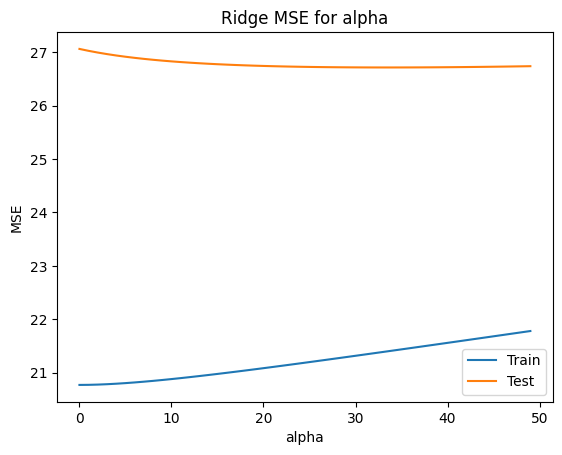

In [131]:
plt.plot(np.arange(0.001, 50), mseRidge_train, label='Train')
plt.plot(np.arange(0.001, 50), mseRidge_test, label='Test')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Ridge MSE for alpha')

Text(0.5, 1.0, 'Lasso MSE for alpha')

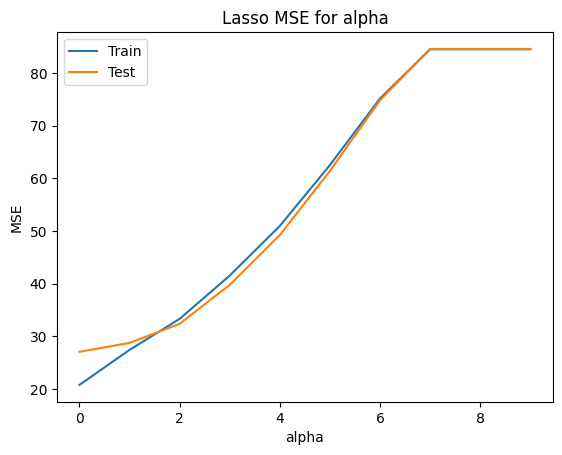

In [134]:
plt.plot(np.arange(0.001, 10), mseLasso_train, label='Train')
plt.plot(np.arange(0.001, 10), mseLasso_test, label='Test')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Lasso MSE for alpha')
